# 분류(classification) 성능 평가 지표
- 정확도(Accuracy)
- 오차행렬(Confusion Matrix)
- 정밀도(Precision)
- 재현율(Recall)
- F1 스코어
- ROC AUC

### 정확도(Accuracy)
> 정확도 = 예측결과가 동일한 데이터 건수/전체 예측 데이터 건수
- 정확도는 직관적으로 모델 예측 성능을 나타내는 평가 지표입니다. 하지만 이진 분류의 경우 데이터의 구성에 따라 ML 모델의 성능을 왜곡할 수 있기 때문에 정확도 수치 하나만 가지고 성능을 평가하지 않습니다.
- 특히 정확도는 **불균형한(imbalanced) 레이블 값 분포**에서 ML 모델의 성능을 판단할 경우, 적합한 평가지표가 아닙니다.

### 오차 행렬(Confusion Matrix)
- 오차 행렬은 이진 분류의 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표입니다.

In [1]:
from sklearn.metrics import confusion_matrix

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
ls ..\\1장\\titanic

 C 드라이브의 볼륨: Windows
 볼륨 일련 번호: 336C-CA6E

 C:\Users\qotnd\00_인프런 인강\1장\titanic 디렉터리

2023-07-04  오후 12:40    <DIR>          .
2023-07-12  오후 01:22    <DIR>          ..
2022-06-04  오전 07:35             3,258 gender_submission.csv
2022-06-04  오전 07:35            28,629 test.csv
2022-06-04  오전 07:35            61,194 train.csv
               3개 파일              93,081 바이트
               2개 디렉터리  110,068,047,872 바이트 남음


In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [5]:
titanic_df = pd.read_csv("../1장/titanic/train.csv")
X_titanic_df = titanic_df.drop("Survived", axis = 1)
y_titanic_df = titanic_df["Survived"]
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df
                                                   , test_size = 0.2, random_state = 0)

In [6]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass
    
    # 입력값으로 들어오는 X 데이터 셋의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self,X):
        return np.zeros( (len(X), 1) , dtype=bool)

# 사이킷런의 내장 데이터 셋인 load_digits( )를 이용하여 MNIST 데이터 로딩
digits = load_digits()

print(digits.data)
print("### digits.data.shape:", digits.data.shape)
print(digits.target)
print("### digits.target.shape:", digits.target.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
### digits.data.shape: (1797, 64)
[0 1 2 ... 8 9 8]
### digits.target.shape: (1797,)


In [7]:
# 불균형한 레이블 데이터 분포도 확인. 
print('레이블 테스트 세트 크기 :', y_test.shape)
print('테스트 세트 레이블 0 과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train , y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test , fakepred)))

레이블 테스트 세트 크기 : (179,)
테스트 세트 레이블 0 과 1의 분포도
0    110
1     69
Name: Survived, dtype: int64
모든 예측을 0으로 하여도 정확도는:0.615


In [8]:
from sklearn.metrics import confusion_matrix

# 앞절의 예측 결과인 fakepred와 실제 결과인 y_test의 Confusion Matrix 출력
confusion_matrix(y_test, fakepred)

array([[110,   0],
       [ 69,   0]], dtype=int64)

예측을 모두 N으로 했음을 알 수 있다. 따라서 제대로 된 모델이라고 볼 수 없으며, 제대로 된 예측이라고 할 수 없다.

### 정밀도(Precision)과 재현율(Recall)
- 정밀도 (TP/FP+TP)
    - 정밀도는 **예측**을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율을 뜻합니다.

- 재현율 (TP/FN+TP)
    - 재현율은 **실제 값**이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율을 뜻합니다.

In [9]:
# 잘못된 모델이며, 예측도 제대로 되지 않았음을 알 수 있다.
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("정밀도 : ", precision_score(y_test, fakepred))
print("재현율 : ", recall_score(y_test, fakepred))

정밀도 :  0.0
재현율 :  0.0


C:\Users\qotnd\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### 오차행렬, 정확도, 정밀도, 재현율을 한꺼번에 계산하는 함수 생성

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    
    print("오차행렬")
    print(confusion)
    print("정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}".format(accuracy, precision, recall))

In [11]:
## 모델링
lr_clf = LogisticRegression(solver = "liblinear")

lr_clf.fit(X_train ,y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차행렬
[[93 17]
 [20 49]]
정확도 : 0.7933, 정밀도 : 0.7424, 재현율 : 0.7101


### 업무에 따른 재현율과 정밀도의 상대적 중요도
- 재현율이 상대적으로 더 중요한 지표인 경우는 실제 Positive 양성인 데이터 예측을 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우 : 암진단, 금융사기 판별
- 정밀도가 상대적으로 더 중요한 지표인 경우는 실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우 : 스팸 메일

*불균형한 레이블 클래스를 가지는 이진 분류 모델에서는 많은 데이터 중에서 중점적으로 찾아야 하는 매우 적은 수의 결괏값에 Positive를 설정해 1값을 부여하고, 그렇지 않은 경우는 Negative로 0값을 일반적으로 부여합니다.

### 정밀도/재현율 트레이드오프
- 분류하려는 업무의 특성상 정밀도 또는 재현율이 특별히 강조돼야 할 경우 분류의 결정 임곗값(Threshold)을 조정해 정밀도 또는 재현율의 수치를 높일 수 있습니다.
- 하지만 정밀도와 재현율은 상호 보완적인 평가 지표이기 때문에 어느한쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉽습니다. 이를 정밀도/재현율의 트레이드오프(Trade-off)라고 부릅니다.

### 분류 결정 임곗값에 다른 Positive 예측 확률 변화
- 분류 결정 임곗값이 낮아질수록 Positive로 예측할 확률이 높아짐.
    - 재현율 증가 : 임곗값이 낮아짐 > positive로 예측하는 빈도수 높아짐 > FN자체가 낮아진다
    - 사이킷런 Esitimator 객체의 predict_proba() 메소드는 분류 결정 예측 확률을 반환합니다.
    - 이를 이용하면 임의로 분류 결정 임곗값을 조정하면서 예측 확률을 변경할 수 있습니다.

### 분류 결정 임곗값에 따른 정밀도, 재현율 곡선
- 사이킷런은 precision_recall_curve() 함수를 통해 임곗값에 따른 정밀도, 재현율의 변화값을 제공합니다.

### 정밀도와 재현율의 맹점
- 정밀도를 100%로 만드는 법
    - **확실한 기준이 되는 경우**만 Positive로 예측하고 나머지는 모두 Negative로 예측합니다. 정밀도 = TP / (TP+FP)입니다. 전체 환자 1000명 중 확실한 Positive 징후만 가진 환자는 단 1명이라고 하면 이 한 명만 Positive로 예측하고 나머지는 모두 Negative로 예측하더라도 FP는 0, TP는 1이 되므로 정밀도는 1/(1+0)으로 100%가 됩니다.
    
    
- 재현율을 100%로 만드는 법
    - **모든 환자를 Positive로 예측**하면 됩니다.재현율 = TP/(TP+FN)이므로 전체 환자 1000명을 다 Positive로 예측하는 겁니다. 이 중 실제 양성인 사람이 30명 정도라도 TN이 수치에 포함되지 않고 FN은 아예 0이므로 30/(30+0)으로 100%가 됩니다.

### F1 Score
- F1 스코어(Score)는 정밀도와 재현율을 결합한 지표입니다. F1 스코어는 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가집니다. F1 스코어의 공식은 다음과 같습니다.
> 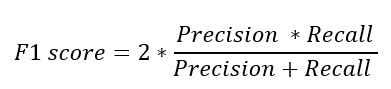

- 만일 A 예측 모델의 경우 정밀도가 0.9, 재현율이 0.1로 극단적인 차이가 나고, B 예측 모델은 정밀도가 0.5, 재현율이 0.5로 정밀도와 재현율이 큰 차이가 없다면 A 예측 모델의 F1 스코어는 0.18이고, B 예측 모델의 F1 스코어는 0.5로 B 모델이 A 모델에 비해 매우 우수한 F1 스코어를 가지게 됩니다. 사이킷런은 f1 score를 위해 f1_score() 함수를 제공합니다.
> ## from sklearn.metrics import f1_score()

In [12]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print("F1 스코어 : {:.4f}".format(f1))

F1 스코어 : 0.7259


In [20]:
def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict)

In [19]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    
    # F1스코어 추가
    f1 = f1_score(y_test, pred)
    
    print("오차 행렬")
    print(confusion)
    
    # f1 score print 추가
    print("정확도 : {:.4f}, 정밀도 : {:.4f}, 재현율 : {:.4f}, F1 : {:.4f}".format(accuracy, precision, recall, f1))
    
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]
pred_proba = lr_clf.predict_proba(X_test)

get_eval_by_threshold(y_test ,pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.4
오차 행렬
[[87 23]
 [14 55]]
정확도 : 0.7933, 정밀도 : 0.7051, 재현율 : 0.7971, F1 : 0.7483
임곗값: 0.45
오차 행렬
[[91 19]
 [18 51]]
정확도 : 0.7933, 정밀도 : 0.7286, 재현율 : 0.7391, F1 : 0.7338
임곗값: 0.5
오차 행렬
[[93 17]
 [20 49]]
정확도 : 0.7933, 정밀도 : 0.7424, 재현율 : 0.7101, F1 : 0.7259
임곗값: 0.55
오차 행렬
[[98 12]
 [23 46]]
정확도 : 0.8045, 정밀도 : 0.7931, 재현율 : 0.6667, F1 : 0.7244
임곗값: 0.6
오차 행렬
[[101   9]
 [ 26  43]]
정확도 : 0.8045, 정밀도 : 0.8269, 재현율 : 0.6232, F1 : 0.7107


### ROC 곡선과 AUC
- ROC(Receiver Operation Characteristic Curve)과 이에 기반한 AUC 스코어는 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표입니다. 일반적으로 의학 분야에서 많이 사용되지만, 머신러닝의 이진 분류 모델의 예측 성능을 판단하는 중요한 평가 지표이기도 합니다.
    - .ROC 곡선은 FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 어떻게 변하는지를 나타내는 곡선입니다. FPR을 X축으로 TPR을 Y축으로 잡으면 FPR의 변화에 따른 TPR의 변화가 곡선 형태로 나타납니다.
    - 분류의 성능 지표로 사용되는 것은 ROC 곡선 면적에 기반한 AUC 값으로 결정합니다. AUC(Area Under Curve)값은 ROC 곡선 밑으 ㅣ면적을 구한것으로 **일반적으로 1에 가까울수록 좋은 수치**입니다.

### ROC 곡선
- TPR은 True Positive Rate의 약자이며, 이는 재현율을 나타냅니다. 따라서 TPR은 TP/(FN+TP)입니다. TPR, 즉 재현율은 민감도로도 불립니다.
- FPR은 실제 Negative(음성)을 잘못 예측한 비율을 나타냅니다. 즉 실제는 Negative인데 Positive로 잘못 예측한 비율입니다. FPR = FP/(FP+TN)입니다.
    - 임곗값을 1로 하면 FPR은 0임(Positive로 예측하는 개수 자체가 없으므로 FP=0이 돼서)
    - 임곗값을 0으로 하면 FPR은 1임(N으로 예측하는 개수가 없어져 TN=0이 되므로 FPR은 1이됨)

### 사이킷런 ROC 곡선 및 AUC 스코어
- 사이킷런은 임곗값에 따른 ROC 곡선 데이터를 roc_curve()로, AUC 스코어를 roc_auc_score() 함수로 제공

- **roc_curve(y_true, y_score)**
    - 입력 파라미터
        - y_true : 실제 클래스 값 array(array shape = [데이터 건수])
        - y_score : predict_proba()의 반환 값 array에서 Positive 컬럼의 예측 확률이 보통 사용됨. Binary 분류 시 shape = [n_samples]
    - 반환 값 
        - fpr : fpr 값을 array로 반환
        - tpr : tpr 값을 array로 반환
        - thresholds : threshold값 array
        

- **roc_auc_score(y_true, y_score)**
    - 입력 파라미터 
        - y_true : 실제 클래스 값 array(array shape = [데이터 건수])
        - y_score : predict_proba()의 반환 값 array에서 Positive 컬럼의 예측 확률이 보통 사용됨. Binary 분류 시 shape = [n_samples]
    - 반환 값
        - auc 스코어 값